In [1]:
import pandas as pd
import numpy as np
import os
import json
import requests
import re
import plotly
import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

## Data Prep

In [3]:
## Load all data, return final data frame
def load_data(dir_name):
    frames = []
    for filename in os.listdir(dir_name):
        frame = pd.read_json(dir_name+"/"+filename, lines=True)
        frames.append(frame)
    df_raw = pd.concat(frames)
    return df_raw

#### comment load_data and %store df_raw after first run, uncomment %store -r df_raw to load data from memory

In [4]:
# df_raw = load_data("./data/newssources")

In [5]:
# %store df_raw
%store -r df_raw

In [6]:
# Filtered for specific columns
col_names = ['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'statistics', 'account']
df_cols = df_raw[col_names]

In [7]:
df_cols[0:1]

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,statistics,account
0,111622404459,2020-11-22 23:59:49,2020-11-25 18:13:36,L.A. County suspends outdoor dining at restaurants as coronavirus surges,latimes.com,"[{'original': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges', 'expanded': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges'}, {'original': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges', 'expanded': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges'}]",https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.facebook.com/edgarreece/posts/3504433216313464,2351,3.73913,"{'actual': {'likeCount': 9, 'shareCount': 32, 'commentCount': 23, 'loveCount': 0, 'wowCount': 2, 'hahaCount': 1, 'sadCount': 9, 'angryCount': 10, 'thankfulCount': 0, 'careCount': 0}, 'expected': {'likeCount': 6, 'shareCount': 4, 'commentCount': 3, 'loveCount': 3, 'wowCount': 2, 'hahaCount': 1, 'sadCount': 1, 'angryCount': 3, 'thankfulCount': 0, 'careCount': 0}}","{'id': 4619429, 'name': 'Council Member Ed Reece', 'handle': 'edgarreece', 'profileImage': 'https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/p200x200/41729566_1855617687861700_8432782541798244352_n.jpg?_nc_cat=106&ccb=2&_nc_sid=dbb9e7&_nc_ohc=BintqqCsj3MAX_7XrAe&_nc_ht=scontent-sea1-1.xx&tp=6&oh=8c2d0a3070a712033f82b1ad071c5ab4&oe=5FE269EF', 'subscriberCount': 2354, 'url': 'https://www.facebook.com/165175133572639', 'platform': 'Facebook', 'platformId': '165175133572639', 'accountType': 'facebook_page', 'pageAdminTopCountry': 'US', 'verified': True}"


In [8]:
## Normalizing account column 
df_acc = df_cols.join(pd.json_normalize(df_cols['account']).add_prefix('account_'))
df_acc = df_acc.drop(columns=['account', 'account_profileImage', 'account_platform', 'account_platformId'])
df_acc[0:1]

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,statistics,account_id,account_name,account_handle,account_subscriberCount,account_url,account_accountType,account_pageAdminTopCountry,account_verified
0,111622404459,2020-11-22 23:59:49,2020-11-25 18:13:36,L.A. County suspends outdoor dining at restaurants as coronavirus surges,latimes.com,"[{'original': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges', 'expanded': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges'}, {'original': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges', 'expanded': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges'}]",https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.facebook.com/edgarreece/posts/3504433216313464,2351,3.73913,"{'actual': {'likeCount': 9, 'shareCount': 32, 'commentCount': 23, 'loveCount': 0, 'wowCount': 2, 'hahaCount': 1, 'sadCount': 9, 'angryCount': 10, 'thankfulCount': 0, 'careCount': 0}, 'expected': {'likeCount': 6, 'shareCount': 4, 'commentCount': 3, 'loveCount': 3, 'wowCount': 2, 'hahaCount': 1, 'sadCount': 1, 'angryCount': 3, 'thankfulCount': 0, 'careCount': 0}}",4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True


In [9]:
## Normalizing account column
stat_col = df_acc.statistics.apply(lambda x: x['actual'])
df_stat = df_acc.join(pd.json_normalize(stat_col).add_prefix('statistics_'))
df_stat = df_stat.drop(columns=['statistics'])
df_stat[0:1]

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,account_id,account_name,account_handle,account_subscriberCount,account_url,account_accountType,account_pageAdminTopCountry,account_verified,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount
0,111622404459,2020-11-22 23:59:49,2020-11-25 18:13:36,L.A. County suspends outdoor dining at restaurants as coronavirus surges,latimes.com,"[{'original': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges', 'expanded': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges'}, {'original': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges', 'expanded': 'https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges'}]",https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.facebook.com/edgarreece/posts/3504433216313464,2351,3.73913,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0


In [10]:
## Adding rows based on 'expandedLinks' column values. One row each for every 'original' (unique) key in the dictionary.
df_exp = df_stat.explode('expandedLinks').reset_index()

In [11]:
expanded_link_original = df_exp.expandedLinks.apply(lambda x: x['expanded'] if not pd.isnull(x) else None)

In [12]:
df_exp = df_exp.rename(columns={'expandedLinks': 'expandedLinksRaw'})
df_final = df_exp.join(expanded_link_original)

In [13]:
final_cols = ['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link', 'postUrl',
       'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount']
news_df = df_final[final_cols].drop_duplicates()

In [14]:
len(news_df)

440477

In [15]:
### Loading NewsGuardTech Ratings
with open("./data/ratings/newsguard-ratings.json") as f:
    ratings = f.read()
ratings_data = json.loads(ratings)

In [16]:
ratings_df = pd.DataFrame(ratings_data.items(), columns=['domain', 'rating'])

In [17]:
## regex to extract valid urls
exp = r'(?i)(.*h?t?tps?://)?(www\.)?([A-Za-z_0-9.-]+).*'
news_df['domain'] = news_df.expandedLinks.str.extract(exp, expand=True)[2]

In [18]:
news_df[['expandedLinks', 'domain']]

,expandedLinks,domain
0,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,latimes.com
2,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,npr.org
3,https://reut.rs/39bWCNG,reut.rs
4,https://m.youtube.com/watch?v=6BsluRkxs78&feature=youtu.be,m.youtube.com
5,https://www.facebook.com/6442438662/posts/10157599122463663/?d=n,facebook.com
...,...,...
482611,https://www.newsleader.com/story/magnolia/taste/2020/11/20/deep-frying-turkey-tips-advice-time-temperature-size-safety-thanksgiving/6171599002/,newsleader.com
482612,https://scnow.com/news/national/watch-now-look-inside-massive-christmas-mansion-in-new-jersey-and-more-of-todays-top/collection_ca3251a1-e2ca-5275-acaa-2ad804792e7f.html?utm_campaign=snd-autopilot&utm_medium=social&utm_source=facebook_Morning_News,scnow.com
482613,https://scnow.com/sports/college/fmu-signs-athletes-for-baseball-womens-hoops/article_d37323d4-2de2-11eb-af76-9f1c501d5fb4.html?utm_campaign=snd-autopilot&utm_medium=social&utm_source=facebook_Morning_News,scnow.com
482614,https://scnow.com/sports/high-school/marion-rb-qualiek-crawford-on-quite-a-run-with-swamp-foxes/article_b153ba4e-2de1-11eb-bf7a-7f29b6c61193.html?utm_medium=social&utm_source=facebook&utm_campaign=user-share,scnow.com


In [19]:
def extract_domain(url):
    exp = r'(?i)(.*h?t?tps?://)?(www\.)?([A-Za-z_0-9.-]+).*'
    try:
        search = re.search(exp, url, re.IGNORECASE)
        return search.groups()[2]
    except Exception as e:
        print(f'Exception for {url} - {e}')

In [20]:
def get_extended_url(url):
    extended_url = ''
    domain = ''
    try:
        extended_url = requests.head(url).headers['location']
    except (KeyError, TypeError) as e:
        print(f'Key/Type Exception for {url} - {e}')
    except requests.exceptions.MissingSchema as e:
        print(f'Missing schema for {url}')
        corrected_url =  'http://'+url
        extended_url = requests.head(corrected_url).headers['location']
    except Exception as e:
        print(f'Exception for {url} - {e}')
    domain = extract_domain(extended_url)    
    if domain and domain in ['trib.al', 'bit.ly', 'tinyurl.com']:
        extended_url = requests.head(extended_url).headers['location']
        domain = extract_domain(extended_url)
    return extended_url, domain

In [21]:
def cleanup_url(url):
    pos = url.find('https')
    if url[-1] == '.':
        url = url[0:-1]
    if pos > 0:
        return url[pos:]
    return url

In [22]:
#### Expanding short urls to obtain the correct domain
to_get_expanded_url = news_df[news_df.domain.isin(['trib.al', 'bit.ly', 'tinyurl.com'])][['id', 'expandedLinks', 'domain']]
short_url_list = to_get_expanded_url.expandedLinks.unique().tolist()

#### comment the following two cells after first run to avoid re-running the domain extraction

In [23]:
# short_expanded_url_map = {}

In [24]:
# for url in short_url_list:
#     if url not in short_expanded_url_map.keys():
#         expanded_url, domain = get_extended_url(cleanup_url(url))
#         if expanded_url != '':
#             short_expanded_url_map[url] = [expanded_url, domain]

#### comment the first line and uncomment the second line after first run to load the map from store

In [25]:
# %store short_expanded_url_map
%store -r short_expanded_url_map

In [26]:
data = [[short_url, val[1]]
        for short_url, val in short_expanded_url_map.items()]
corrected_domain_df = pd.DataFrame(data, columns=['expandedLinks', 'corrected_domain'])

In [27]:
news_updated_domain_df = pd.merge(news_df,corrected_domain_df,how='left',left_on=['expandedLinks'],right_on=['expandedLinks'])
news_updated_domain_df['domain'] = np.where(news_updated_domain_df['corrected_domain'].notnull(), news_updated_domain_df['corrected_domain'], news_updated_domain_df['domain'])
news_updated_domain_df = news_updated_domain_df.drop(columns=['corrected_domain'])

In [28]:
### Joining news_updated_domain_df with ratings_df
news_ratings_df = pd.merge(news_updated_domain_df,ratings_df,how='left',left_on=['domain'],right_on=['domain'])

In [29]:
news_ratings_df_filtered = news_ratings_df[news_ratings_df['rating'].notna()]

In [30]:
news_ratings_df_filtered['credible'] = news_ratings_df_filtered.rating.apply(lambda x: True if x >= 60 else False)

<ipython-input-30-801278aae509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_ratings_df_filtered['credible'] = news_ratings_df_filtered.rating.apply(lambda x: True if x >= 60 else False)


In [31]:
news_ratings_df_filtered.head()

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,account_id,account_name,account_handle,account_subscriberCount,account_url,account_accountType,account_pageAdminTopCountry,account_verified,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount,domain,rating,credible
0,111622404459,2020-11-22 23:59:49,2020-11-25 18:13:36,L.A. County suspends outdoor dining at restaurants as coronavirus surges,latimes.com,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.facebook.com/edgarreece/posts/3504433216313464,2351,3.739130,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,latimes.com,100.0,True
1,111678477449,2020-11-23 23:59:58,2020-11-25 18:17:53,Trump Administration To Begin Biden Transition Protocols,npr.org,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,https://www.facebook.com/OccupySpokane/posts/3477341109030911,21775,2.333333,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,npr.org,100.0,True
2,111737873253,2020-11-24 23:59:23,2020-11-25 16:15:55,"Russia, eyeing foreign markets, says Sputnik COVID-19 vaccine to cost under $20",reuters.com,https://reut.rs/39bWCNG,https://reut.rs/39bWCNG,https://www.facebook.com/groups/335017933691230/permalink/962329240960093,18498,-21.000000,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,reut.rs,100.0,True
5,111622415061,2020-11-22 23:59:48,2020-11-25 18:11:01,This is a re-share of a post,NaN,https://www.businessinsider.com/china-emotional-surveillance-technology-2018-4,https://www.facebook.com/100576118560804/posts/100621611889588/,https://www.facebook.com/groups/378361242549568/permalink/1253075498411467,388,-0.750000,12571754,Australia & New Zealand Geoengineering Watch,NaN,388,https://www.facebook.com/groups/378361242549568,facebook_group,NaN,False,103,11,3,15,0,1,0,0,0,0,businessinsider.com,100.0,True
8,111622415061,2020-11-22 23:59:48,2020-11-25 18:11:01,This is a re-share of a post,NaN,https://www.wsj.com/articles/chinas-efforts-to-lead-the-way-in-ai-start-in-its-classrooms-11571958181,https://www.facebook.com/100576118560804/posts/100621611889588/,https://www.facebook.com/groups/378361242549568/permalink/1253075498411467,388,-0.750000,12571754,Australia & New Zealand Geoengineering Watch,NaN,388,https://www.facebook.com/groups/378361242549568,facebook_group,NaN,False,103,11,3,15,0,1,0,0,0,0,wsj.com,100.0,True


In [32]:
news_ratings_df_filtered.to_csv('news_ratings_df_filtered.csv', index=False)

In [33]:
%store news_ratings_df_filtered
# %store -r news_ratings_df_filtered

Stored 'news_ratings_df_filtered' (DataFrame)


## Analysis

In [34]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [35]:
pd.options.plotting.backend = "plotly"
## set svg_option = None to disable svg and to obtain larger plots with interactive values
svg_option = "svg"

In [36]:
news_ratings_data = news_ratings_df_filtered

In [37]:
# %store news_ratings_data
%store -r news_ratings_data

#### percentage of credible and non-credible domains in unique domains

In [38]:
newsguard_domains_count = news_ratings_data[['domain', 'credible']].groupby('credible').domain.nunique().reset_index().sort_values('credible', ascending=False)

In [39]:
total_domains_count = newsguard_domains_count.domain[0]+newsguard_domains_count.domain[1]
newsguard_domains_count['percentage'] = newsguard_domains_count.domain.apply(lambda x: x*100.0/total_domains_count)
newsguard_domains_count

,credible,domain,percentage
1,True,999,96.708616
0,False,34,3.291384


### General Characterization

In [40]:
news_ratings_data.columns

Index(['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link',
       'postUrl', 'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount', 'domain', 'rating', 'credible'],
      dtype='object')

In [41]:
### number of posts
posts = news_ratings_data['id']
unique_posts = len(posts.unique())
print('#Unique Posts: ', unique_posts)

#Unique Posts:  331839


In [42]:
### number of unique URLs
urls = news_ratings_data['expandedLinks']
print('#Total URLs: ', len(urls))
print('#Unique URLs: ', len(urls.unique()))

#Total URLs:  340931
#Unique URLs:  182377


In [43]:
### number of users
users = news_ratings_data['account_id']
print('#Users: ', len(users.unique()))

#Users:  40077


In [44]:
### number of credible and non-credible articles
credibility_summary = news_ratings_data[['id', 'credible']].groupby('credible').count().sort_values('id', ascending=False).reset_index()

#### % of Credible and Non-Credible Users

In [45]:
total_credible_count = credibility_summary.id[0]+credibility_summary.id[1]
credibility_summary['percentage'] = credibility_summary.id.apply(lambda x: x*100.0/total_credible_count)
credibility_summary

,credible,id,percentage
0,True,320763,94.084434
1,False,20168,5.915566


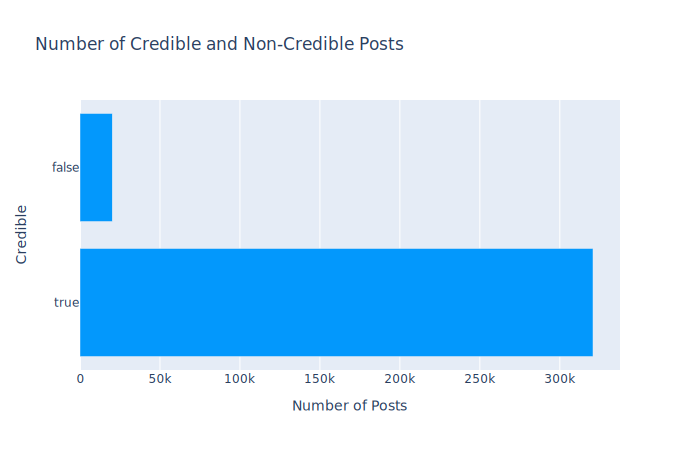

In [46]:
fig = go.Figure(data=go.Bar(x=credibility_summary.id, y=credibility_summary.credible, orientation='h', marker={'color':'#0398fc'}))
fig.update_layout(
    title="Number of Credible and Non-Credible Posts",
    yaxis_title="Credible",
    xaxis_title="Number of Posts")
fig.show(svg_option)

In [47]:
fig.write_image("images/credible_noncredible_count.png")

In [48]:
news_ratings_data['date'] = pd.to_datetime(news_ratings_data.date)

In [49]:
news_ratings_data['day'] = news_ratings_data.date.dt.floor('d')

In [50]:
cred_df = pd.pivot_table(news_ratings_data, values = 'id', index = 'day',
               columns = 'credible',aggfunc ='count').reset_index()

In [51]:
cred_df.head()

credible,day,False,True
0,2020-11-22,5912,85259
1,2020-11-23,6700,113137
2,2020-11-24,7556,122367


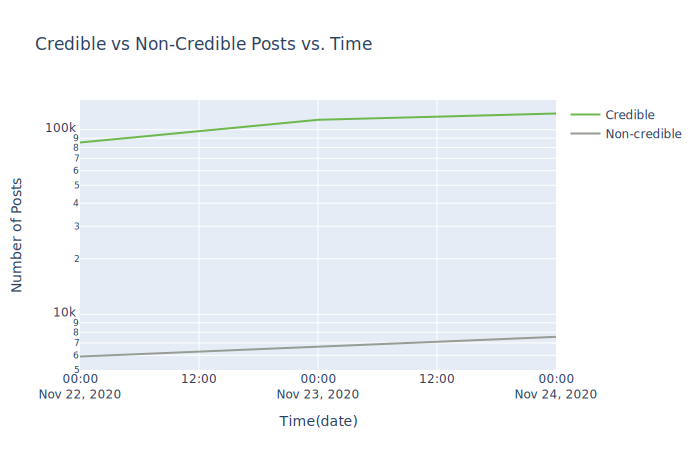

In [52]:
fig = go.Figure(data=go.Scatter(x=cred_df.day, y=cred_df[True],mode='lines', line_color='#6db84d', name='Credible'))
fig.add_trace(go.Scatter(x=cred_df.day, y=cred_df[False],mode='lines', line=dict(color="#979c95"), name='Non-credible'))
fig.update_yaxes(type="log")
fig.update_layout(
    title="Credible vs Non-Credible Posts vs. Time",
    xaxis_title="Time(date)",
    yaxis_title="Number of Posts")

fig.show(svg_option)

In [53]:
fig.write_image("images/credible_noncredible_over_time.png")

### Popularity Analysis

In [54]:
domains = pd.pivot_table(news_ratings_data, values = 'id',index = ['domain', 'rating', 'credible'], aggfunc ='count').sort_values(['rating', 'id'], ascending=False).reset_index()

In [55]:
## credible news sources sorted by rating and number of posts
credible_domains = domains[domains.credible == True]

In [56]:
print("Number of Credible Domains: ", len(credible_domains))
print("Top 20 Credible Domains: ")
print(credible_domains[['domain', 'rating']][0:20])

Number of Credible Domains:  999
Top 20 Credible Domains: 
                 domain  rating
0             patch.com   100.0
1       theguardian.com   100.0
2           nytimes.com   100.0
3               cnn.com   100.0
4           nbcnews.com   100.0
5    washingtonpost.com   100.0
6   businessinsider.com   100.0
7               npr.org   100.0
8                cbc.ca   100.0
9           cbsnews.com   100.0
10         usatoday.com   100.0
11          reuters.com   100.0
12         politico.com   100.0
13              wsj.com   100.0
14          latimes.com   100.0
15         newsweek.com   100.0
16              pbs.org   100.0
17             vice.com   100.0
18           ctvnews.ca   100.0
19               cnn.it   100.0


In [57]:
## non-credible news sources sorted by rating and number of posts
noncredible_domains = domains[(domains['credible'] == False) & (domains['rating'] != -1.0)].sort_values('rating', ascending=True)

In [58]:
print("Number of Non-Credible Domains: ", len(noncredible_domains))
print("Top 20 Non-Credible Domains: ")
print(noncredible_domains[['domain', 'rating']][0:20])

Number of Non-Credible Domains:  34
Top 20 Non-Credible Domains: 
                            domain  rating
1032                 zerohedge.com     0.0
1031      worldnewsdailyreport.com     7.5
1030               sputniknews.com     7.5
1029               naturalnews.com    12.5
1028              yournewswire.com    15.0
1027  theconservativetreehouse.com    17.5
1026                  lifenews.com    17.5
1025              lifesitenews.com    17.5
1024          thegatewaypundit.com    20.0
1022                       wnd.com    25.0
1023                  infowars.com    25.0
1021           americanthinker.com    27.5
1020                gregpalast.com    32.0
1019                  arabnews.com    32.0
1018                        rt.com    32.5
1017            westernjournal.com    32.5
1016         middleeastmonitor.com    40.0
1015                  theblaze.com    40.0
1013                   pjmedia.com    42.0
1012                  redstate.com    42.0


#### Popularity of credible sources over time

In [59]:
credible_top5_domains = credible_domains[['domain']][0:5]
credible_top5_list = credible_top5_domains['domain'].to_list()
print(credible_top5_list)

['patch.com', 'theguardian.com', 'nytimes.com', 'cnn.com', 'nbcnews.com']


In [60]:
credible_domains['percentage'] = credible_domains.id.apply(lambda x: x*100.0/credibility_summary.id[0])

<ipython-input-60-c61ebe1d56ef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
credible_domains

,domain,rating,credible,id,percentage
0,patch.com,100.0,True,37113,11.570225
1,theguardian.com,100.0,True,8353,2.604103
2,nytimes.com,100.0,True,7845,2.445731
3,cnn.com,100.0,True,7385,2.302323
4,nbcnews.com,100.0,True,5412,1.687227
...,...,...,...,...,...
994,lifezette.com,62.5,True,388,0.120962
995,hotair.com,62.5,True,95,0.029617
996,wgnradio.com,62.5,True,34,0.010600
997,scmp.com,62.0,True,815,0.254082


In [62]:
credible_top5_trend_df =  pd.pivot_table(news_ratings_data[news_ratings_data['domain'].isin(credible_top5_list)], values = 'id',index = 'day', columns = 'domain', aggfunc ='count').sort_values(['day'], ascending=True).reset_index()

In [63]:
credible_top5_trend_df.head()

domain,day,cnn.com,nbcnews.com,nytimes.com,patch.com,theguardian.com
0,2020-11-22,2055,1289,2052,10551,2561
1,2020-11-23,2441,1962,2962,14052,2770
2,2020-11-24,2889,2161,2831,12510,3022


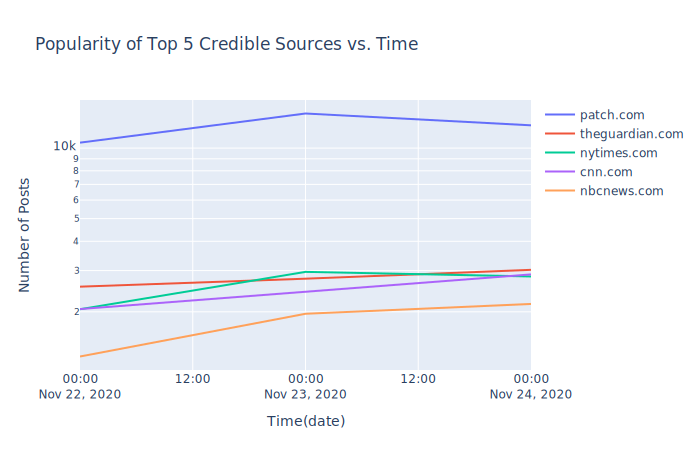

In [64]:
fig = go.Figure(data=go.Scatter(x=credible_top5_trend_df.day, y=credible_top5_trend_df[credible_top5_list[0]],mode='lines', name=credible_top5_list[0]))
for col in credible_top5_list[1:]:
                fig.add_trace(go.Scatter(x=credible_top5_trend_df.day, y=credible_top5_trend_df[col],mode='lines', name=col))
fig.update_yaxes(type="log")
fig.update_layout(
title="Popularity of Top 5 Credible Sources vs. Time",
xaxis_title="Time(date)",
yaxis_title="Number of Posts")
fig.show(svg_option)

In [65]:
fig.write_image("images/top_credible_over_time.png")

#### Popularity of non-credible sources over time

In [66]:
noncredible_top5_domains = noncredible_domains[['domain']][0:5]
noncredible_top5_list = noncredible_top5_domains['domain'].to_list()
print(noncredible_top5_list)

['zerohedge.com', 'worldnewsdailyreport.com', 'sputniknews.com', 'naturalnews.com', 'yournewswire.com']


In [67]:
noncredible_domains['percentage'] = noncredible_domains.id.apply(lambda x: x*100.0/credibility_summary.id[1])

In [68]:
noncredible_domains.sort_values(['percentage'], ascending=False)

,domain,rating,credible,id,percentage
1000,breitbart.com,57.0,False,3821,18.945855
1017,westernjournal.com,32.5,False,2993,14.840341
1024,thegatewaypundit.com,20.0,False,2793,13.848671
1015,theblaze.com,40.0,False,1341,6.649147
1018,rt.com,32.5,False,1049,5.201309
1032,zerohedge.com,0.0,False,809,4.011305
1006,aljazeera.com,52.0,False,807,4.001388
1012,redstate.com,42.0,False,648,3.213011
1004,dailykos.com,54.5,False,602,2.984927
1013,pjmedia.com,42.0,False,599,2.970052


In [69]:
noncredible_top5_trend_df =  pd.pivot_table(news_ratings_data[news_ratings_data['domain'].isin(noncredible_top5_list)], values = 'id',index = 'day', columns = 'domain', aggfunc ='count').sort_values(['day'], ascending=True).reset_index()

In [70]:
noncredible_top5_trend_df.head()

domain,day,naturalnews.com,sputniknews.com,worldnewsdailyreport.com,yournewswire.com,zerohedge.com
0,2020-11-22,NaN,68.0,1.0,2.0,213.0
1,2020-11-23,2.0,94.0,3.0,87.0,286.0
2,2020-11-24,NaN,67.0,4.0,7.0,310.0


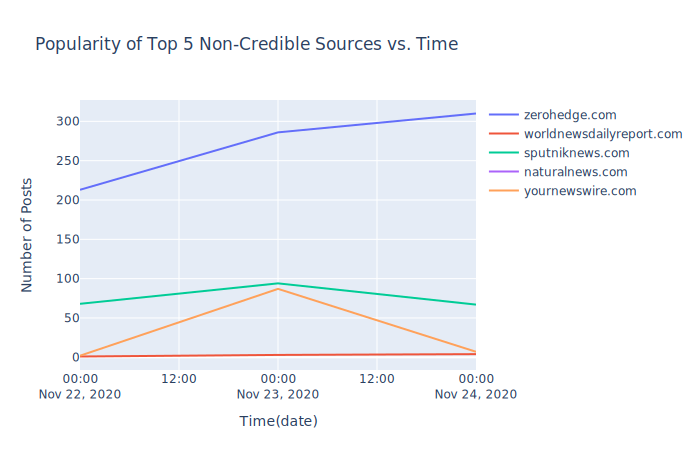

In [71]:
fig = go.Figure(data=go.Scatter(x=noncredible_top5_trend_df.day, y=noncredible_top5_trend_df[noncredible_top5_list[0]],mode='lines', name=noncredible_top5_list[0]))
for col in noncredible_top5_list[1:]:
                fig.add_trace(go.Scatter(x=noncredible_top5_trend_df.day, y=noncredible_top5_trend_df[col],mode='lines', name=col))
# fig.update_yaxes(type="log")
fig.update_layout(
title="Popularity of Top 5 Non-Credible Sources vs. Time",
xaxis_title="Time(date)",
yaxis_title="Number of Posts")
fig.show(svg_option)

In [72]:
fig.write_image("images/top_noncredible_over_time.png")

### Engagement Analysis

In [73]:
news_ratings_data.columns

Index(['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link',
       'postUrl', 'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount', 'domain', 'rating', 'credible', 'day'],
      dtype='object')

In [74]:
import matplotlib.pyplot as plt
def plot_cdf(list_counts, xlabel, path, leg=False, islogx=True, title=None):
    for l in list_counts:
        l.sort()
    fig, ax = plt.subplots(figsize=(6,4))
    yvals = []
    for l in list_counts:
        yvals.append(np.arange(len(l))/float(len(l)-1))
    for i in range(len(list_counts)):
        ax.plot(list_counts[i], yvals[i])
    if islogx:
        ax.set_xscale("log")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel('CDF')
    plt.grid()
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    
    if leg:
        plt.legend(leg, loc='best', fontsize=13)
    
    plt.show()
    fig.savefig(path, bbox_inches='tight')

In [75]:
def plot_statistics_cdf(metric, islogx=True):
    stat = f'statistics_{metric}Count'
    list_of_posts_stat_metric = [news_ratings_data[news_ratings_data["credible"] == True][['id', stat]].drop_duplicates()[stat].tolist(),
                        news_ratings_data[news_ratings_data["credible"] == False][['id', stat]].drop_duplicates()[stat].tolist()]
    plot_cdf(list_of_posts_stat_metric, 
        '# of posts',
        leg=['Credible', 'Non-Credible'],
        path=f'images/cdf_{metric}.pdf',
        title=f"CDF - {metric}",
        islogx=islogx)

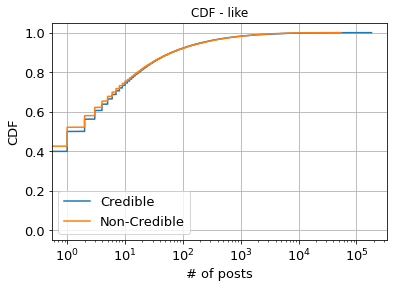

In [76]:
plot_statistics_cdf('like')

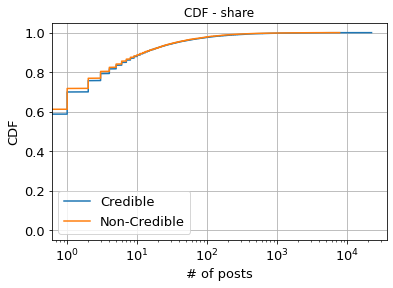

In [77]:
plot_statistics_cdf('share')

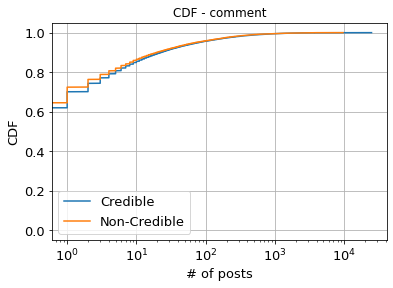

In [78]:
plot_statistics_cdf('comment')

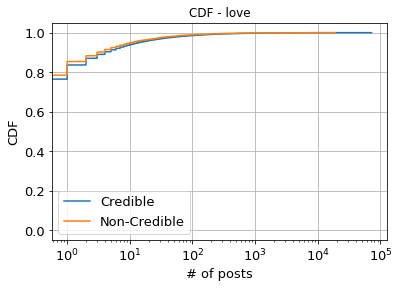

In [79]:
plot_statistics_cdf('love')

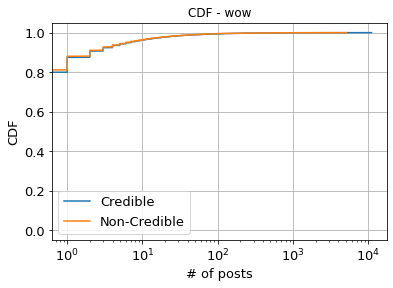

In [80]:
plot_statistics_cdf('wow')

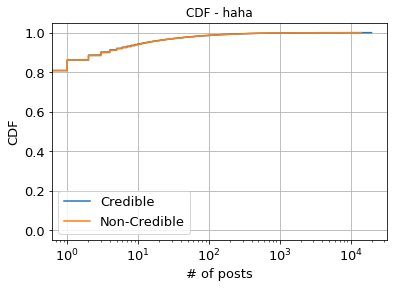

In [81]:
plot_statistics_cdf('haha')

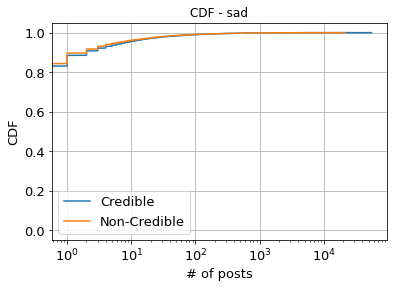

In [82]:
plot_statistics_cdf('sad')

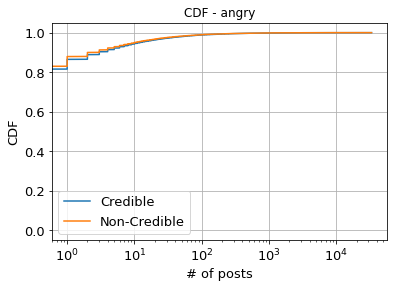

In [83]:
plot_statistics_cdf('angry')

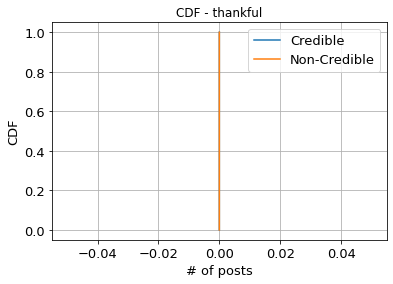

In [84]:
plot_statistics_cdf('thankful', islogx=False)

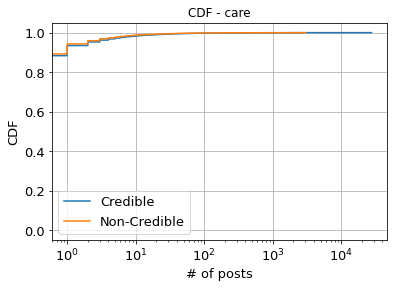

In [85]:
plot_statistics_cdf('care')